## Contents
- NLP on Amazon Production Data (Testing)
- NLP on 3K Training data
- Removing 7k from Production data and merginig with Training data

In [31]:
import pandas as pd

In [32]:
#pd.set_option('max_colwidth', 1)

pd.set_option('display.max_rows', 10)

In [48]:
import warnings
warnings.filterwarnings("ignore")

## Amazon dataset

In [49]:
df_ama = pd.read_csv('Amazon_Basic_EDA_03.csv', index_col=0)

In [50]:
df_ama.drop(labels=['categories','name','primaryCategories','reviews.date','reviews.doRecommend','reviews.numHelpful','reviews.username'], axis=1, inplace=True)

In [51]:
df_ama.drop(labels=['combined_scores','combined_compound','score','Compound_Score'], axis=1, inplace=True)

In [52]:
df_ama['reviews.rating'] = df_ama['reviews.rating'].astype(int)

In [53]:
df_ama = df_ama[(df_ama['reviews.rating']==1) | (df_ama['reviews.rating']==5)]

In [54]:
df_ama.reset_index(drop=True, inplace=True)

In [55]:
df_ama.head(1)

,reviews.rating,reviews.text,reviews.title,text_title
0,5,Well they are not Duracell but for the price i am happy.,... are not Duracell but for the price i am happy.,... are not Duracell but for the price i am happy. Well they are not Duracell but for the price i am happy.


# Text Processing

## Replacing 'US' country alone. As it's creating a lot of discrepencies to use the country library to replace.

In [57]:
df_ama['text_title'].replace(to_replace='US',value='United States of America', inplace=True, regex=True)

## Regex

In [58]:
import re

REPLACE_NO_SPACE = re.compile("[.;:!\?,\"()\[\-&$@*^=%#`~+<>_|{}/]")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")


def preprocess_reviews(reviews):
    reviews = [REPLACE_NO_SPACE.sub(" ", line.lower()) for line in reviews]
    #reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
    
    return reviews

In [59]:
df_ama['regex'] = preprocess_reviews(df_ama['text_title'])

In [60]:
df_ama.drop('text_title', axis=1, inplace=True)

## Spelling mistake correction

In [1]:
from textblob import TextBlob

In [62]:
df_ama['corrected'] = df_ama['regex'].apply(lambda txt: ''.join(TextBlob(txt).correct()))

## Lemmatization

In [63]:
def get_lemmatized_text(corpus):
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]

In [64]:
df_ama['lemmatized'] =  get_lemmatized_text(df_ama['corrected'])

## Stopwords Removal

In [65]:
from nltk.corpus import stopwords

sw = stopwords.words('english')
ss = sorted(sw)
print(ss)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some',

In [66]:
words_not_to_remove = ['no','not','above', 'after', 'against', 'aren',
                       "aren't", 'before', 'below', 'between', 'both', 'but','couldn',"couldn't", "don't",'didn', "didn't", 
                       'do', 'does', 'doesn', "doesn't" , 'hadn', "hadn't", 'hasn', "hasn't", 'haven', 'isn', "isn't", "haven't", 'mightn', "mightn't", 'mustn', "mustn't",'needn', "needn't",'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", "won't", 
                       'wouldn', "wouldn't",'y']

In [67]:
stop_words = []

for i in ss:
    if i not in words_not_to_remove:
        stop_words.append(i)

In [68]:
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split() if word not in stop_words]))
    return removed_stop_words

In [69]:
df_ama['lem_stpwrd'] = remove_stop_words(df_ama['lemmatized'])

In [70]:
df_ama.columns

Index(['reviews.rating', 'reviews.text', 'reviews.title', 'regex', 'corrected',
       'lemmatized', 'lem_stpwrd'],
      dtype='object')

In [71]:
df_ama.drop(labels=['regex', 'corrected','lemmatized'], axis=1, inplace=True)

In [93]:
df_ama.head()

,reviews.rating,reviews.text,reviews.title,lem_stpwrd
0,5,Well they are not Duracell but for the price i am happy.,... are not Duracell but for the price i am happy.,not duracell but price happy well not duracell but price happy
1,5,Seem to work as well as name brand batteries at a much better price,... as well as name brand batteries at a much better,well name brand battery much better seem work well name brand battery much better price
2,5,These batteries are very long lasting the price is great.,... batteries are very long lasting the price is great.,battery long lasting price great battery long lasting price great
3,5,Bought a lot of batteries for Christmas and the AmazonBasics Cell have been good. I haven't noticed a difference between the brand name batteries and the Amazon Basic brand. Just a lot easier to purchase and have arrive at the house and have on hand. Will buy again.,... batteries for Christmas and the AmazonBasics Cell have been good. I haven't noticed a difference between the brand ...,battery christmas amazonbasics cell good haven't noticed difference between brand bought lot battery christmas amazonbasics cell good haven't noticed difference between brand name battery amazon basic brand lot easier purchase arrive house hand buy
4,5,ive not had any problame with these batteries have ordered them in the past been very pleased.,... batteries have ordered them in the past been very pleased.,battery ordered past pleased give not problem battery ordered past pleased


# 3K Training records

In [73]:
df_3k = pd.read_csv('Merged_ratings.csv', index_col=0)

## Replacing 'US' country alone. As it's creating a lot of discrepencies to use the country library to replace.

In [75]:
df_3k['text'].replace(to_replace='US',value='United States of America', inplace=True, regex=True)

## Regex

In [76]:
import re

REPLACE_NO_SPACE = re.compile("[.;:!\?,\"()\[\-&$@*^=%#`~+<>_|{}/]")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")


def preprocess_reviews(reviews):
    reviews = [REPLACE_NO_SPACE.sub(" ", line.lower()) for line in reviews]
    #reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
    
    return reviews

In [77]:
df_3k['regex'] = preprocess_reviews(df_3k['text'])

In [78]:
df_3k.drop('text', axis=1, inplace=True)

## Spelling mistake correction

In [81]:
from textblob import TextBlob

In [82]:
df_3k['corrected'] = df_3k['regex'].apply(lambda txt: ''.join(TextBlob(txt).correct()))

## Lemmatization

In [83]:
def get_lemmatized_text(corpus):
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]

In [84]:
df_3k['lemmatized'] =  get_lemmatized_text(df_3k['corrected'])

## Stopwords Removal

In [85]:
from nltk.corpus import stopwords

sw = stopwords.words('english')
ss = sorted(sw)
print(ss)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some',

In [86]:
words_not_to_remove = ['no','not','above', 'after', 'against', 'aren',
                       "aren't", 'before', 'below', 'between', 'both', 'but','couldn',"couldn't", "don't",'didn', "didn't", 
                       'do', 'does', 'doesn', "doesn't" , 'hadn', "hadn't", 'hasn', "hasn't", 'haven', 'isn', "isn't", "haven't", 'mightn', "mightn't", 'mustn', "mustn't",'needn', "needn't",'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", "won't", 
                       'wouldn', "wouldn't",'y']

In [87]:
stop_words = []

for i in ss:
    if i not in words_not_to_remove:
        stop_words.append(i)

In [88]:
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split() if word not in stop_words]))
    return removed_stop_words

In [89]:
df_3k['lem_stpwrd'] = remove_stop_words(df_3k['lemmatized'])

In [90]:
df_3k.columns

Index(['label', 'regex', 'corrected', 'lemmatized', 'lem_stpwrd'], dtype='object')

In [91]:
df_3k.drop(labels=['regex', 'corrected','lemmatized'], axis=1, inplace=True)

In [158]:
df_3k.reset_index(drop=True, inplace=True)

In [159]:
df_3k

,label,lem_stpwrd
0,0,no way plug united state america unless go converted
1,1,good case excellent value
2,1,great jawbone
3,0,tied charge conversation lasting 45 minute major problem
4,1,mid great
...,...,...
2995,0,think food flavor texture both lacking
2996,0,appetite instantly gone
2997,0,overall wa not impressed would not go back
2998,0,whole experience wa underwhelming think we'll go nina next time


# Extracting good (5 rating) and bad (1 rating) reviews from Amazon dataset to add to the training 3k dataset

### Apply TextBlob text polarity for identifying records without Anomalies from Amazon dataset

In [94]:
df_ama['blob_polarity'] = df_ama['lem_stpwrd'].apply(lambda x: TextBlob(str(x)).sentiment[0])

#### Replacing ratings 5 and 1 by 1 and 0 resp. for simplicity

In [96]:
df_ama['reviews.rating'].replace({5:1,1:0}, inplace=True)

## Good reviews (5 ratings)

In [98]:
df_check_p  = df_ama[df_ama['blob_polarity']>0.7]

In [100]:
df_check_p['reviews.rating'].value_counts()

1    6961
0    7   
Name: reviews.rating, dtype: int64

In [105]:
pd.set_option('display.max_rows', 100)

In [106]:
df_check_p.sample(n=100, random_state=20)


,reviews.rating,reviews.text,reviews.title,lem_stpwrd,blob_polarity
9358,1,Great batteries at a great pricr,Performs as well as the brand names,perform well brand name great battery great price,0.800000
8697,1,"Great bargain and batteries, work as well as name brand I had been using. will be using these from now on.",Great bargain and batteries,great bargain battery great bargain battery work well name brand using using,0.800000
11288,1,"Fire tablets never disappoints! Great price, used my certificate points which helpedAlways best price at best but",Fire Hd 8 tablet,fire 8 tablet fire tablet never disappoints great price used certificate point helpedalways best price best but,0.933333
19677,1,Great alternative to iPad Mini. Great for Amazon Prime members,Great alternative to iPad Mini,great alternative pad mind great alternative pad mind great amazon prime member,0.800000
33819,1,"Kindle fire is great! I already have one myself, so am happy to be giving one as a gift!",kindle fire is great,kindle fire great kindle fire great already one happy giving one gift,0.800000
13809,1,"If you are a Amazon Prime member, this is one of the best tablets to have, awesome!",Awesome!!!,awesome amazon prime member one best tablet awesome,1.000000
32372,1,This kindle is awesome. Great picture fast internet.,Awesome tablet,awesome tablet kindle awesome great picture fast internet,0.750000
19165,1,Great-----------------------------------------------,Wonderful,wonderful great,0.900000
14151,1,For the price this is a great tablet. Got it for my wife for Christmas and she loves it.,Great Tablet,great tablet price great tablet got wife christmas love,0.700000
12160,1,Great product for the price! Works great and comes with ample storage.,Great Product!,great product great product price work great come ample storage,0.800000


- Manually checked 100+ records for the 6961. They were all +ve

In [116]:
ind_5_remove = df_check_p[df_check_p['reviews.rating']==0].index.to_list()

In [117]:
ind_5_remove

[27864, 29633, 30415, 32211, 33396, 37259, 40028]

In [118]:
df_check_p.drop(index=ind_5_remove, inplace=True)

### Removing these 7k records from Amazon dataset

In [119]:
pindex_to_remove = df_check_p.index.to_list()

In [120]:
len(pindex_to_remove)

6961

In [121]:
df_ama.shape

(48587, 5)

In [122]:
df_ama.drop(index=pindex_to_remove, inplace=True)

In [124]:
df_ama.shape

(41626, 5)

### Resetting index after removing 6.9k records

In [125]:
df_check_p.reset_index(drop=True,inplace=True)

In [126]:
df_check_p['reviews.rating'].value_counts()

1    6961
Name: reviews.rating, dtype: int64

### Bad reviews (rating = 1)

In [127]:
df_check_n  = df_ama[df_ama['blob_polarity'] < 0.0]  # threshold below 0, gives decent amount of records

In [128]:
df_check_n['reviews.rating'].value_counts()

1    789
0    738
Name: reviews.rating, dtype: int64

In [129]:
df_check_n = df_check_n[df_check_n['reviews.rating']==0]

In [132]:
df_check_n.sample(n=100, random_state=20)

,reviews.rating,reviews.text,reviews.title,lem_stpwrd,blob_polarity
5764,0,These batteries are very poor quality and do not last even half the time of standard Energizer or Duracell batteries,Poor quality,poor quality battery poor quality do not last even half time standard energy duracell battery,-0.193333
5876,0,Junk...save your money... totally useless batteries that last hours if that.,SAVE YOUR MONEY - GARBAGE PRODUCT,save money garage product june save money totally useless battery last hour,-0.250000
20774,0,I bought the kindle fire 8 for my husband and I to use. Neither one of us have been able to figure out how to use it. Every time we open it advertisements pop up. And we just try buttons to remove it. We cannot get it to rotate for our puzzles. Just too complicated to use and to navigate around. I will be returning it. We have an iPad and it's much easier.,Unable to use it,unable use bought kindle fire 8 husband use neither one u able figure use every time open advertisement pop try button remove cannot get rotate puzzled complicated use navigable around returning pad much easier,-0.060000
9153,0,I ordered these thinking they were rechargeable (I recognize the error on my part but that is not my complaint here) .. so when I received them and used them I was not surprised that they died VERY quickly. Upon attempting to recharge these I figured out they aren't rechargeable (Once again big duh on my part)..Now I'm seriously surprised that I'm only getting a few hours of use out of them!! like a quarter of the use that a typical battery should offer. Horribly disappointed.. I will go back to the name brand batteries for sure.,like a quarter of the use that a typical battery ...,like quarter use typical battery ordered thinking rechargeable recognize error part but not complaint received used wa not surprised died quickly upon attempting charge figured aren't rechargeable big due part i'm seriously surprised i'm getting hour use like quarter use typical battery offer horribly disappointed go back name brand battery sure,-0.015909
5626,0,never again. don't last. especially short life in cold weather.,One Star,one star never don't last especially short life cold weather,-0.200000
42401,0,"I have Alexa now 5 months running.You would expect, that Alexa can anwser many, many questions. It can (maybe), but you have to know which App has the answer, you have to install the app and you have every time to say a special commands . Stupid. Alexa is out of the box very stupid. And after investing hours - she is not much more knowledgeable. It's a stupid AI.",Not as good as expected and promised.,not good expected promised area 5 month running would expect area answer many many question maybe but know pp ha answer install pp every time say special command stupid area box stupid after investing hour not much knowledgeable stupid ai,-0.176984
9742,0,Worst batteries ever. They have a short life in every item I used them in. One example (but similar with all devices): I have a battery operated clock that needs the batteries changed every 3 years. I need to change these every three months. Will never purchase these again.,Worst ever- no battery life- avoid these,worst ever no battery life avoid worst battery ever short life every item used one example but similar device battery operated clock need battery changed every 3 year need change every three month never purchase,-0.500000
32038,0,It started cutting off and on by itself!!! Its like it had a mind of its own!!!,Not really a good tablet!,not really good tablet started cutting like mind,-0.475000
5637,0,terrible,One Star,one star terrible,-1.000000
7115,0,"I am disappointed with this purchase. I purchased these for my Dad, delivered to him in October, 2015. I am visiting, and just opened the brand new package, and inserted 4 of them to run his blood pressure cuff. The machine worked, but the battery indicator showed low, I switched the batteries with other brand new amazon batteries - 

In [139]:
df_check_n['reviews.rating'].value_counts()

0    738
Name: reviews.rating, dtype: int64

- Manually checked 100 samples from the record. They are all -ve

### Removing these 738 records from Amazon dataset

In [133]:
nindex_to_remove = df_check_n.index.to_list()

In [134]:
len(nindex_to_remove)

738

In [136]:
df_ama.shape

(41626, 5)

In [137]:
df_ama.drop(index=nindex_to_remove, inplace=True)

In [138]:
df_ama.shape

(40888, 5)

### Resetting the indexes after removing the negative records

In [140]:
df_check_n.reset_index(drop=True, inplace=True)

In [142]:
pd.set_option('display.max_rows', 10)

In [143]:
df_pn_concat = pd.concat([df_check_p,df_check_n], axis=0)

In [145]:
df_pn_concat.reset_index(drop=True, inplace=True)

In [147]:
# what was removed from the Amazon dataset
df_pn_concat['reviews.rating'].value_counts()

1    6961
0    738 
Name: reviews.rating, dtype: int64

In [148]:
df_pn_concat = df_pn_concat[['reviews.rating','lem_stpwrd']]

In [149]:
df_pn_concat.rename(columns=({'reviews.rating':'label'}), inplace=True)

In [150]:
df_pn_concat['label'] = df_pn_concat['label'].astype(int)

In [151]:
df_pn_concat.shape

(7699, 2)

### Concatenate 2 files

In [161]:
# 3k records

df_train = pd.concat([df_3k,df_pn_concat], axis=0)

In [162]:
df_train.shape

(10699, 2)

In [163]:
df_train.reset_index(drop=True, inplace=True)

In [165]:
df_train.isnull().sum()

label         0
lem_stpwrd    0
dtype: int64

# Saving the training data (3k+7k) and testing (Amazon)

### Training model

In [166]:
df_train.to_csv('Final_train_data.csv')

### Testing data

In [167]:
df_ama.to_csv('Final_test_data.csv')

## EDA 
### WordCloud 

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Final_test_data.csv')

In [27]:
df_positive = df[df['reviews.rating']==1]
df_negative = df[df['reviews.rating']==0]

In [28]:
wc_positive = df_positive['lem_stpwrd'].tolist()
wc_negative = df_negative['lem_stpwrd'].tolist()

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

##### Positive WordCloud

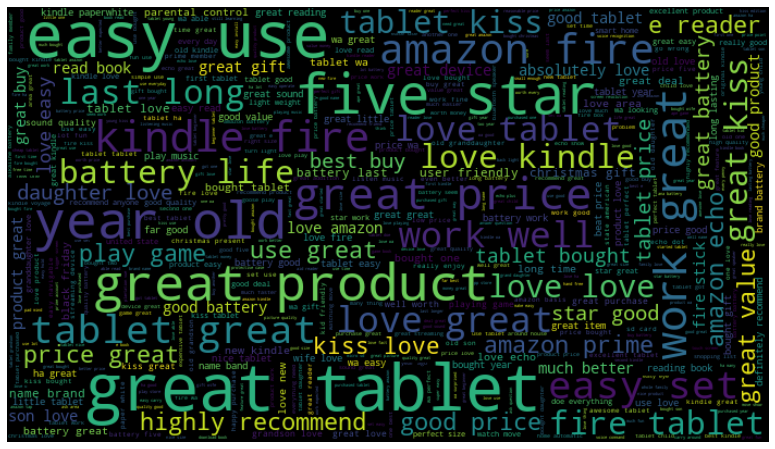

In [29]:
unique_string=(" ").join(wc_positive)
wordcloud = WordCloud(width = 700, height = 400,max_font_size=60, max_words=2000, collocation_threshold = 3, stopwords= None).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

##### Negative WordCloud

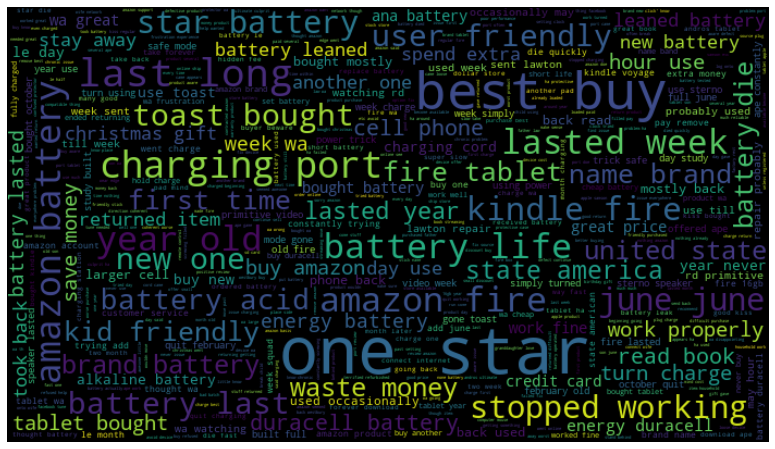

In [32]:
unique_string=(" ").join(wc_negative)
wordcloud = WordCloud(width = 700, height = 400,max_font_size=60, max_words=2000, collocation_threshold = 3, stopwords= None).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()